In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
l = 1
g = 9.8
theta0 = 0.001
T = 2*np.pi*np.sqrt(l/g)
w = 2*np.pi/T

dt = [0.1, 0.01, 0.001]

## Euler method

2.000000000000001
2.007368421052659
2.0071578947369404
2.007089923154493


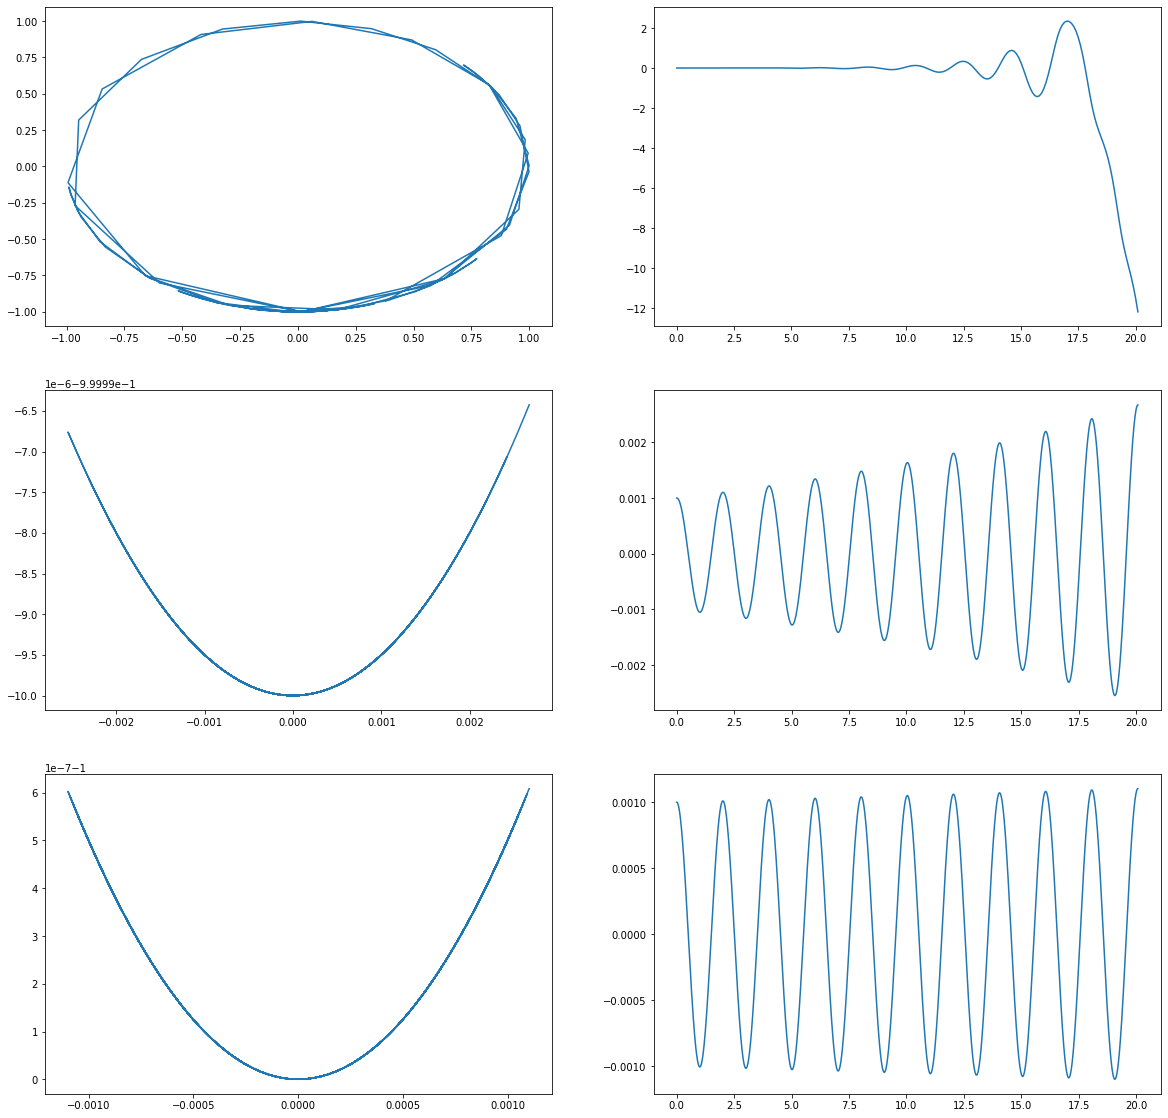

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(4*5, 4*5))
ax = ax.flatten()

k = 0

for i in range(len(dt)):
    
    theta = []
    dtheta = []
    t = []
    tt = []
    Ti = 0
    
    theta.append(theta0)
    dtheta.append(0)
    t.append(0)

    ti = 0
    j = 0
    
    while ti <= 10*T:
        
        dtheta.append(dtheta[j] + -w**2*np.sin(theta[j])*dt[i])
        theta.append(theta[j] + dtheta[j]*dt[i])
        
        if (np.sin(theta[j+1]))*(np.sin(theta[j])) < 0:
            
            tt.append(ti)

        j = j + 1
        ti = ti + dt[i]
        t.append(ti)
            
    x = l*np.sin(theta)
    y = -l*np.cos(theta)
    
    ax[2*k].plot(x, y)
    ax[2*k+1].plot(t, theta)
    k = k+1
    
    Ti = 2*(max(tt) - min(tt))/(len(tt)-1)

    print(Ti)
    
print(T)

plt.show()

## Staggered algorithm

2.031578947368422
2.0073684210526586
2.0070526315790453
2.007089923154493


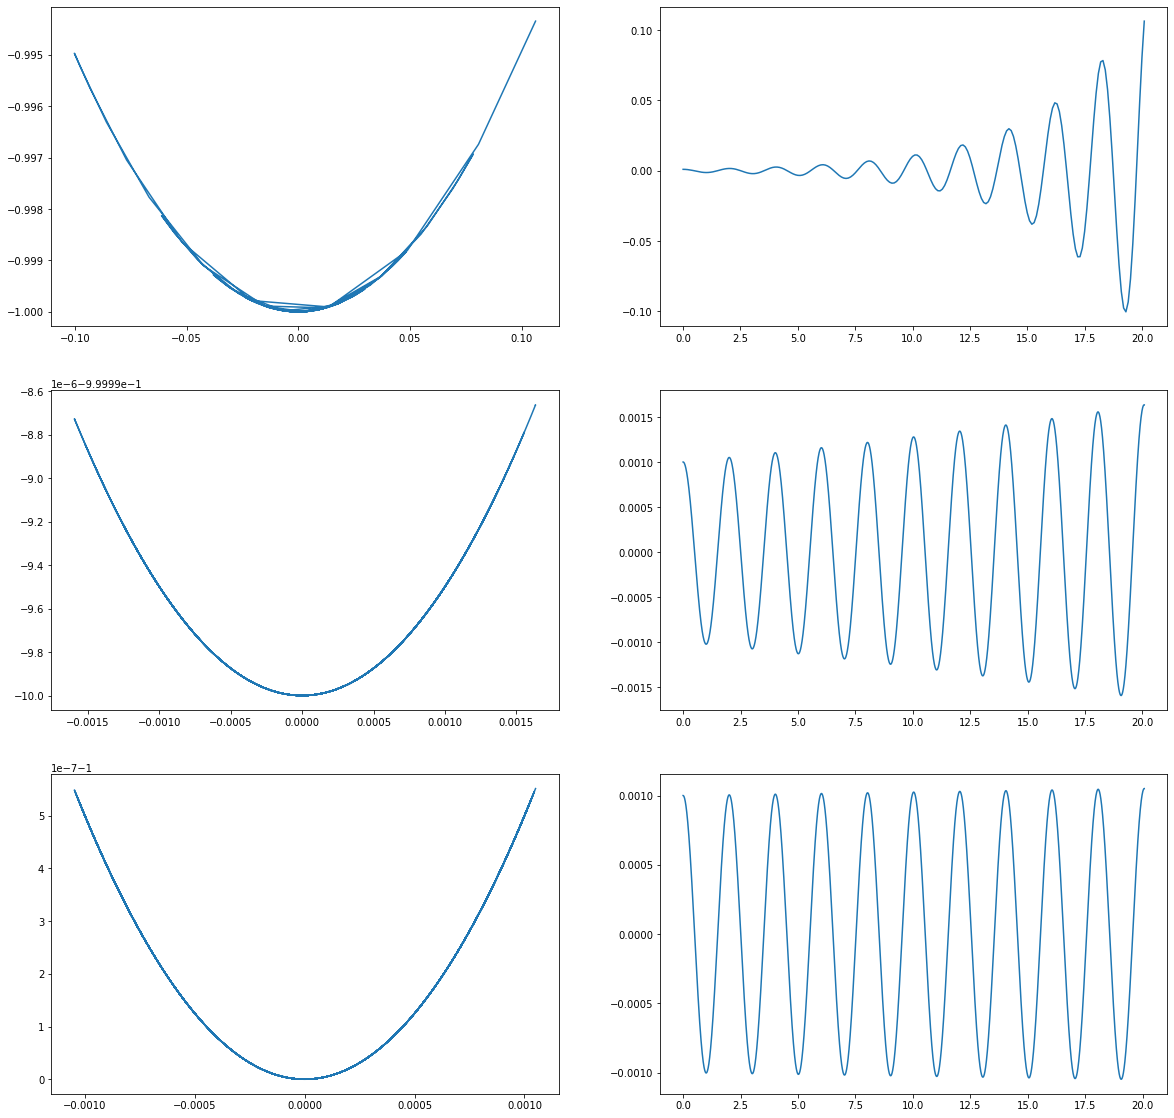

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(4*5, 4*5))
ax = ax.flatten()

k = 0

for i in range(len(dt)):
    
    theta = []
    dtheta = []
    t = []
    tt = []
    
    theta.append(theta0)
    dtheta.append(0)
    t.append(0)

    ti = 0
    j = 0
    
    while ti <= 10*T:
        dtheta.append(dtheta[j] + -w**2*np.sin(theta[j])*dt[i])
        theta.append(theta[j] + (dtheta[j+1]+dtheta[j])*dt[i]/2)

        if (np.sin(theta[j+1]))*(np.sin(theta[j])) < 0:
            
            tt.append(ti)
        
        j = j + 1
        ti = ti + dt[i]
        t.append(ti)
    
    xx = l*np.sin(theta)
    yy = -l*np.cos(theta)
    
    ax[2*k].plot(xx, yy)
    ax[2*k+1].plot(t, theta)
    k = k + 1
    
    Ti = 2*(max(tt) - min(tt))/(len(tt)-1)

    print(Ti)
    
print(T)


plt.show()

## Velocity Verlet algorithm

2.000000000000001
2.0063157894737116
2.0071578947369404
2.007089923154493


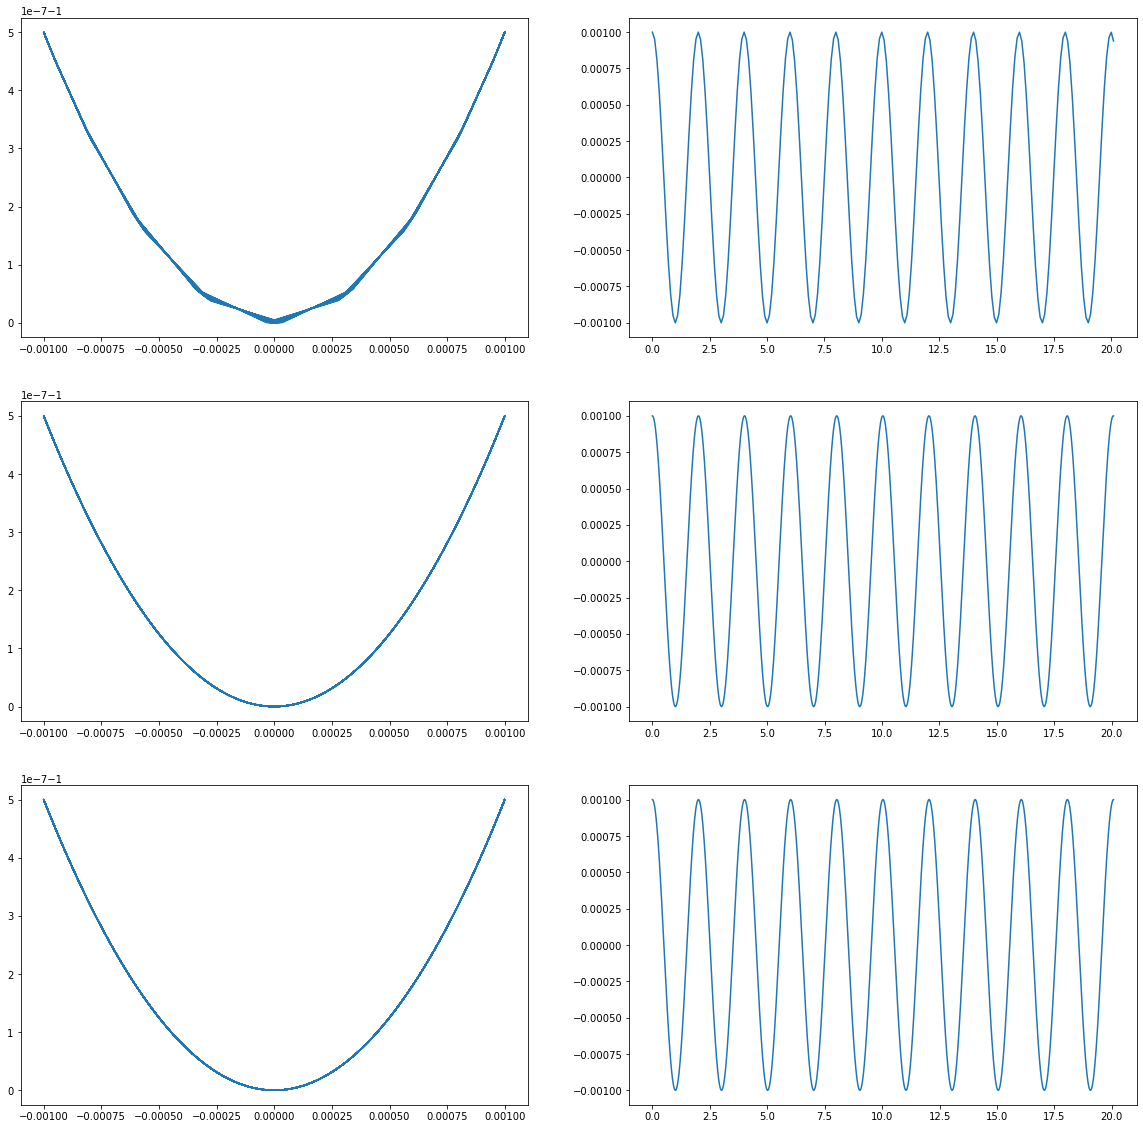

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(4*5, 4*5))
ax = ax.flatten()

k = 0

for i in range(len(dt)):
    
    theta = []
    dtheta = []
    t = []
    tt = []
    
    theta.append(theta0)
    dtheta.append(0)
    t.append(0)

    ti = 0
    j = 0
    
    while ti <= 10*T:

        dtheta.append(dtheta[2*j] - w**2*np.sin(theta[j])*dt[i]/2)
        theta.append(theta[j] + dtheta[2*j+1]*dt[i])
        dtheta.append(dtheta[2*j+1] - w**2*np.sin(theta[j+1])*dt[i]/2)

        if (np.sin(theta[j+1]))*(np.sin(theta[j])) < 0:
            
            tt.append(ti)
        
        j = j + 1
        ti = ti + dt[i]
        t.append(ti)
            
    xx = l*np.sin(theta)
    yy = -l*np.cos(theta)
    
    ax[2*k].plot(xx, yy)
    ax[2*k+1].plot(t, theta)
    k = k + 1

    Ti = 2*(max(tt) - min(tt))/(len(tt)-1)

    print(Ti)

print(T)

plt.show()